In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
#These are basic library so no need for explaination 

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
#This is done to make the model making process smoother nothing else 

In [3]:
import cv2 
import os 
import PIL
import pathlib
#So let me explain the use of these libraries 

In [4]:
#Use of os library 
#os library will help us to intract with operating system aka will help to import and export the dataset from the storage of kaggle 

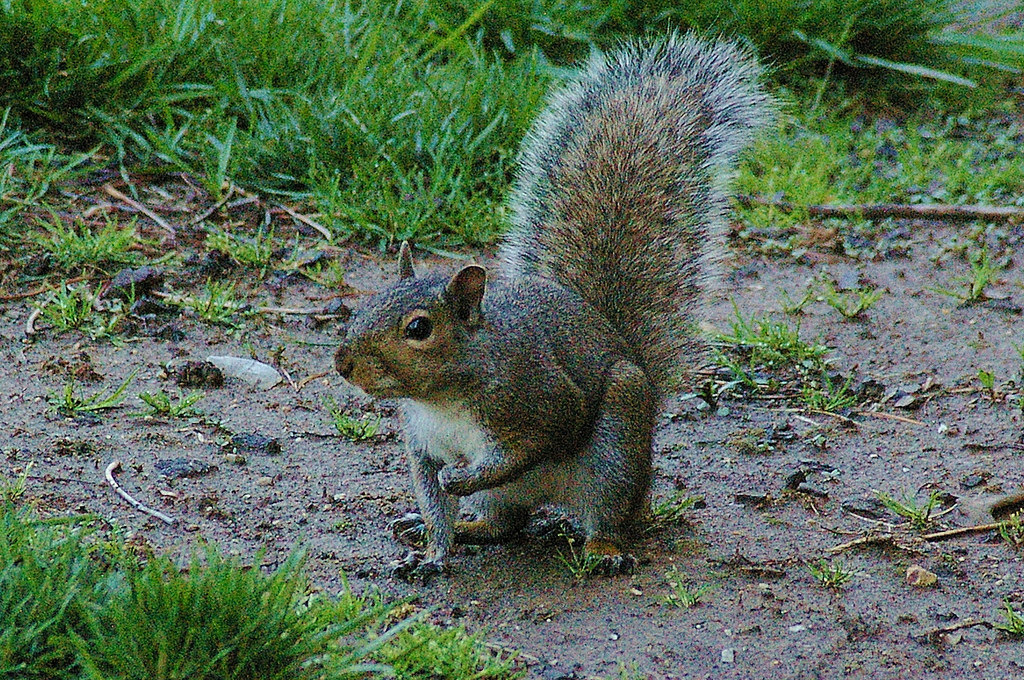

In [5]:
#Use of Pillow library aka PIL library 
PIL.Image.open("/kaggle/input/vlg-recruitment-24-challenge/vlg-dataset/vlg-dataset/test/00001.jpg")

In [6]:
#As u can see above that it will help us to show the images by inputing image path 

In [7]:
#Use of cv2 library 
#it is will help us to manipulate and read image pixels .

In [8]:
#Use of pathlib library 
#It is will help us to categorize the data for the model to learn 

In [9]:
data_dir="/kaggle/input/vlg-recruitment-24-challenge/vlg-dataset/vlg-dataset/train"
#This is will help us later for categorization by the use of pathlib library 

In [10]:
data_dir=pathlib.Path(data_dir)
data_dir
#As you can see data_dir has now been converted to a posixpath which is better for us than simple string str path before 
#This posixpath seemed interesting to me and i will talk about it in post_thoughts 

PosixPath('/kaggle/input/vlg-recruitment-24-challenge/vlg-dataset/vlg-dataset/train')

In [11]:
list(data_dir.glob('*/*.jpg'))[:5]
#As you can see glob function has helped us to categorize all files with ".jpg" in train directory 

[PosixPath('/kaggle/input/vlg-recruitment-24-challenge/vlg-dataset/vlg-dataset/train/wolf/03913.jpg'),
 PosixPath('/kaggle/input/vlg-recruitment-24-challenge/vlg-dataset/vlg-dataset/train/wolf/08162.jpg'),
 PosixPath('/kaggle/input/vlg-recruitment-24-challenge/vlg-dataset/vlg-dataset/train/wolf/00680.jpg'),
 PosixPath('/kaggle/input/vlg-recruitment-24-challenge/vlg-dataset/vlg-dataset/train/wolf/03154.jpg'),
 PosixPath('/kaggle/input/vlg-recruitment-24-challenge/vlg-dataset/vlg-dataset/train/wolf/00802.jpg')]

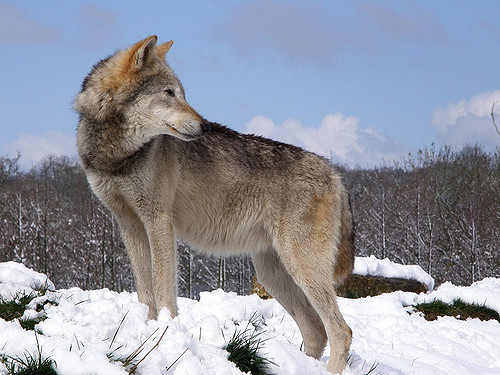

In [12]:
PIL.Image.open(str(list(data_dir.glob('*/*.jpg'))[0]))
#We have to type cast the posixpath to str as it is  a posixpath object not a string type.

In [13]:
image_count=len(list(data_dir.glob('*/*.jpg')))
#Self explainatory 
image_count

9544

In [14]:
#As the folders are a lot and writting them with brute force will take a lot of time so we will make a for loop containing name of all folders but first we have to make a list with all folder names 
folder_names = [item.name for item in data_dir.iterdir() if item.is_dir()]
#item.name will give the item's name 
#data_dir.iterdir() will iterate over the directory with the path in data_dir which already contains the posixpath to train directory 
#"if item.is_dir()" will check if the item is directory or not 

# Print the folder names
print(folder_names)

['wolf', 'antelope', 'hamster', 'skunk', 'lion', 'otter', 'giant+panda', 'raccoon', 'hippopotamus', 'bobcat', 'pig', 'rat', 'spider+monkey', 'buffalo', 'mouse', 'tiger', 'bat', 'grizzly+bear', 'dalmatian', 'killer+whale', 'siamese+cat', 'humpback+whale', 'chihuahua', 'beaver', 'polar+bear', 'german+shepherd', 'elephant', 'zebra', 'seal', 'cow', 'ox', 'mole', 'giraffe', 'persian+cat', 'dolphin', 'blue+whale', 'leopard', 'deer', 'weasel', 'walrus']


In [15]:
#now we will create the dataset to be used for making a input array for our model
# It will help us in mapping dataset of x and y later 
animals_dataset={}
for i in folder_names:
    if("+" in i):
        i_new=i.replace('+',' ')
        animals_dataset[f"{i_new}"] = list(data_dir.glob(f'{i}/*'))
    else:
        animals_dataset[f"{i}"] = list(data_dir.glob(f'{i}/*'))
#Here i have paid close attention that animals with two word names should not contain as given in dataset so it more presentable 
#Now we will make a label list for making of output array

In [16]:
extra=[]
class_path="/kaggle/input/vlg-recruitment-24-challenge/vlg-dataset/vlg-dataset/classes.txt"
with open(class_path, 'r') as file:
    for line in file:
        line=line.split()
        if(line[1] in folder_names):
            pass
        else:
            print(line[1])
            extra.append(line[1])
            folder_names.append(line[1])

horse
moose
gorilla
fox
sheep
chimpanzee
squirrel
rhinoceros
rabbit
collie


In [17]:
leftout_dir="/kaggle/input/animal-image-dataset-90-different-animals/animals/animals"
leftout_dir=pathlib.Path(leftout_dir)
for i in extra:
    animals_dataset[f'{i}']=list(leftout_dir.glob(f'{i}/*'))
rabbit_dir="/kaggle/input/cat-vs-rabbit/train-cat-rabbit/rabbit"
rabbit_dir=pathlib.Path(rabbit_dir)
animals_dataset['rabbit']=list(rabbit_dir.glob('*.jpg'))[:250]
moose_dir="/kaggle/input/moose-and-collie/Moose detection.v1i.retinanet/train"
moose_dir=pathlib.Path(moose_dir)
animals_dataset['moose']=list(moose_dir.glob('*.jpg'))[:250]
collie_dir="/kaggle/input/moose-and-collie/xa14kcwlpkyeb4vprlojb/images.cv_xa14kcwlpkyeb4vprlojb/data/train/border_collie"
collie_dir=pathlib.Path(collie_dir)
animals_dataset['collie']=list(collie_dir.glob('*.jpg'))[:250]

In [18]:
img=cv2.imread('/kaggle/input/vlg-recruitment-24-challenge/vlg-dataset/vlg-dataset/train/antelope/00044.jpg')
img.shape
#This will convert a img from its path to a 3d array that has his value of rgb color.
#Here shape function gives the value of number of pixels in x,y and lastly 3 tells us that it contains different value of rgb combinations 
#This will help us to provide input to the model

(622, 1024, 3)

In [19]:
animals_label=[]
for i in folder_names:
    if('+' in i):
        name_new=(i).replace('+',' ')
        animals_label.append(name_new)
        continue 
    else:
        animals_label.append(i)
#It will help in getting the name of animal related to the number. 

In [20]:
x=[]
y=[]
for i in animals_dataset:
    for j in animals_dataset[i]:
        img=cv2.imread(str(j))#Reading its rgb combination and converting it into a 3d array 
        img= cv2.resize(img ,(224,224))#As all the images have different size , we have to resize the image by cv2 library.
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        x.append(img)
        y.append(animals_label.index(i))
#Here we are making x and y where x contains the 3d array of its rgb combination and y contains its related number of its animal name .
#After trial and error it seems the cap is 200 by 200 without crossing the RAM limit

In [21]:
x=np.array(x)
y=np.array(y)
#Converting the list into numpy arrays as tensorflow takes arrays


In [22]:
from tensorflow.keras.applications.densenet import preprocess_input
x = preprocess_input(x)

In [23]:
x.shape

(10714, 224, 224, 3)

In [24]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',       # Monitor validation loss
    patience=5,               # Stop training after 5 epochs of no improvement
    restore_best_weights=True # Restore model weights from the best epoch
)


In [25]:
from tensorflow.keras.applications import DenseNet121

# Load the ResNet152V2 model
resnet_base = DenseNet121(
    include_top=False,         # Whether to include the fully connected layer at the top
    weights='imagenet',       # Pre-trained weights ('imagenet') or None for random initialization
    input_shape=(224, 224, 3),# Shape of input images (must have 3 channels for RGB)
    pooling='avg',             # Pooling mode for feature extraction: None, 'avg', or 'max'
)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [26]:
data_augmentation = keras.Sequential([  
    layers.RandomFlip("horizontal") ,
    layers.RandomZoom(0.5),
    layers.RandomContrast(0.2),
])

In [27]:
from keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
resnet_base.trainable=False
model = Sequential([
  Input(shape=(224,224,3)),   
  resnet_base ,
  layers.Dense(1024, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
  layers.Dropout(0.5),
  layers.Dense(50, activation ='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4) ,
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])
              
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2 , random_state=0)
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, callbacks=[early_stopping])
#As this model is subject to change so i am not putting comments in it 

Epoch 1/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 72s 180ms/step - accuracy: 0.2603 - loss: 11.7547 - val_accuracy: 0.8203 - val_loss: 6.2737
Epoch 2/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.7576 - loss: 5.8401 - val_accuracy: 0.8735 - val_loss: 4.3346
Epoch 3/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 17s 64ms/step - accuracy: 0.8331 - loss: 4.2227 - val_accuracy: 0.8983 - val_loss: 3.5062
Epoch 4/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 17s 64ms/step - accuracy: 0.8823 - loss: 3.4017 - val_accuracy: 0.8978 - val_loss: 2.9493
Epoch 5/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 17s 64ms/step - accuracy: 0.8841 - loss: 2.8646 - val_accuracy: 0.9057 - val_loss: 2.5015
Epoch 6/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.9033 - loss: 2.4076 - val_accuracy: 0.9151 - val_loss: 2.1291
Epoch 7/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.9039 - loss: 2.0534 - val_accuracy: 0.9132 - val_loss: 1.8250
Epoch 8/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.9228 - loss: 1.7332 

In [31]:
model.evaluate(x,y)

335/335 ━━━━━━━━━━━━━━━━━━━━ 26s 78ms/step - accuracy: 0.9542 - loss: 1.0898


[1.1027867794036865, 0.9506253600120544]

In [34]:
test_dir=pathlib.Path("/kaggle/input/vlg-recruitment-24-challenge/vlg-dataset/vlg-dataset/test")
test_images = [item.name for item in test_dir.iterdir()]
test_images.sort()
testing=[]
for i in test_images:
    arr=cv2.imread(f"/kaggle/input/vlg-recruitment-24-challenge/vlg-dataset/vlg-dataset/test/{i}")
    arr = cv2.cvtColor(arr, cv2.COLOR_BGR2RGB)
    arr=cv2.resize(arr,(224,224))
    arr = preprocess_input(arr)
    testing.append(arr)
testing=np.array(testing)

In [35]:
predictions=model.predict(testing)
csv_class=[]
for i in range(len(test_images)):
    csv_class.append(animals_label[np.argmax(predictions[i])])
df = pd.DataFrame({
    "image_id": test_images ,
    "class" : csv_class } )
df.to_csv("predictions5.csv", index=False)

94/94 ━━━━━━━━━━━━━━━━━━━━ 23s 166ms/step
